
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

### 2. Загрузка данных

In [65]:
df = pd.read_csv('sales.csv')
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

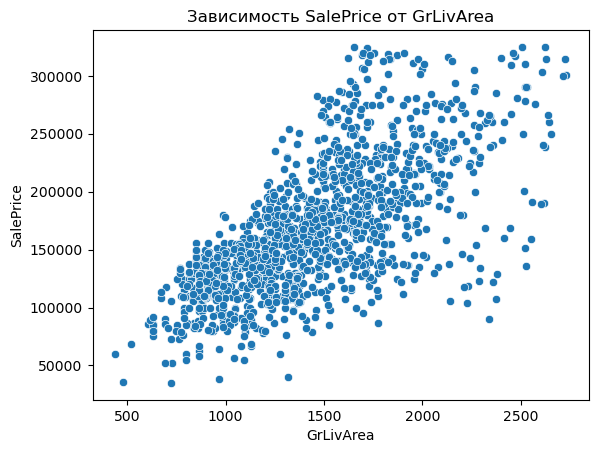

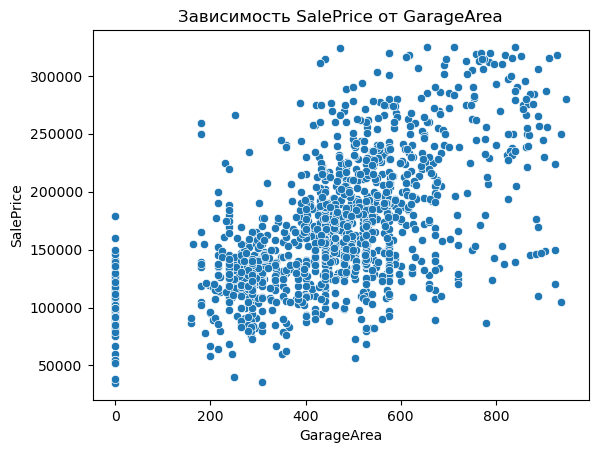

KeyError: "None of [Index(['Street', 'SaleCondition'], dtype='object')] are in the [columns]"

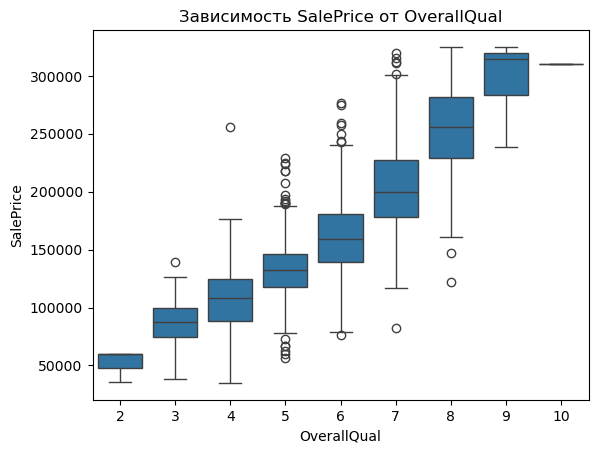

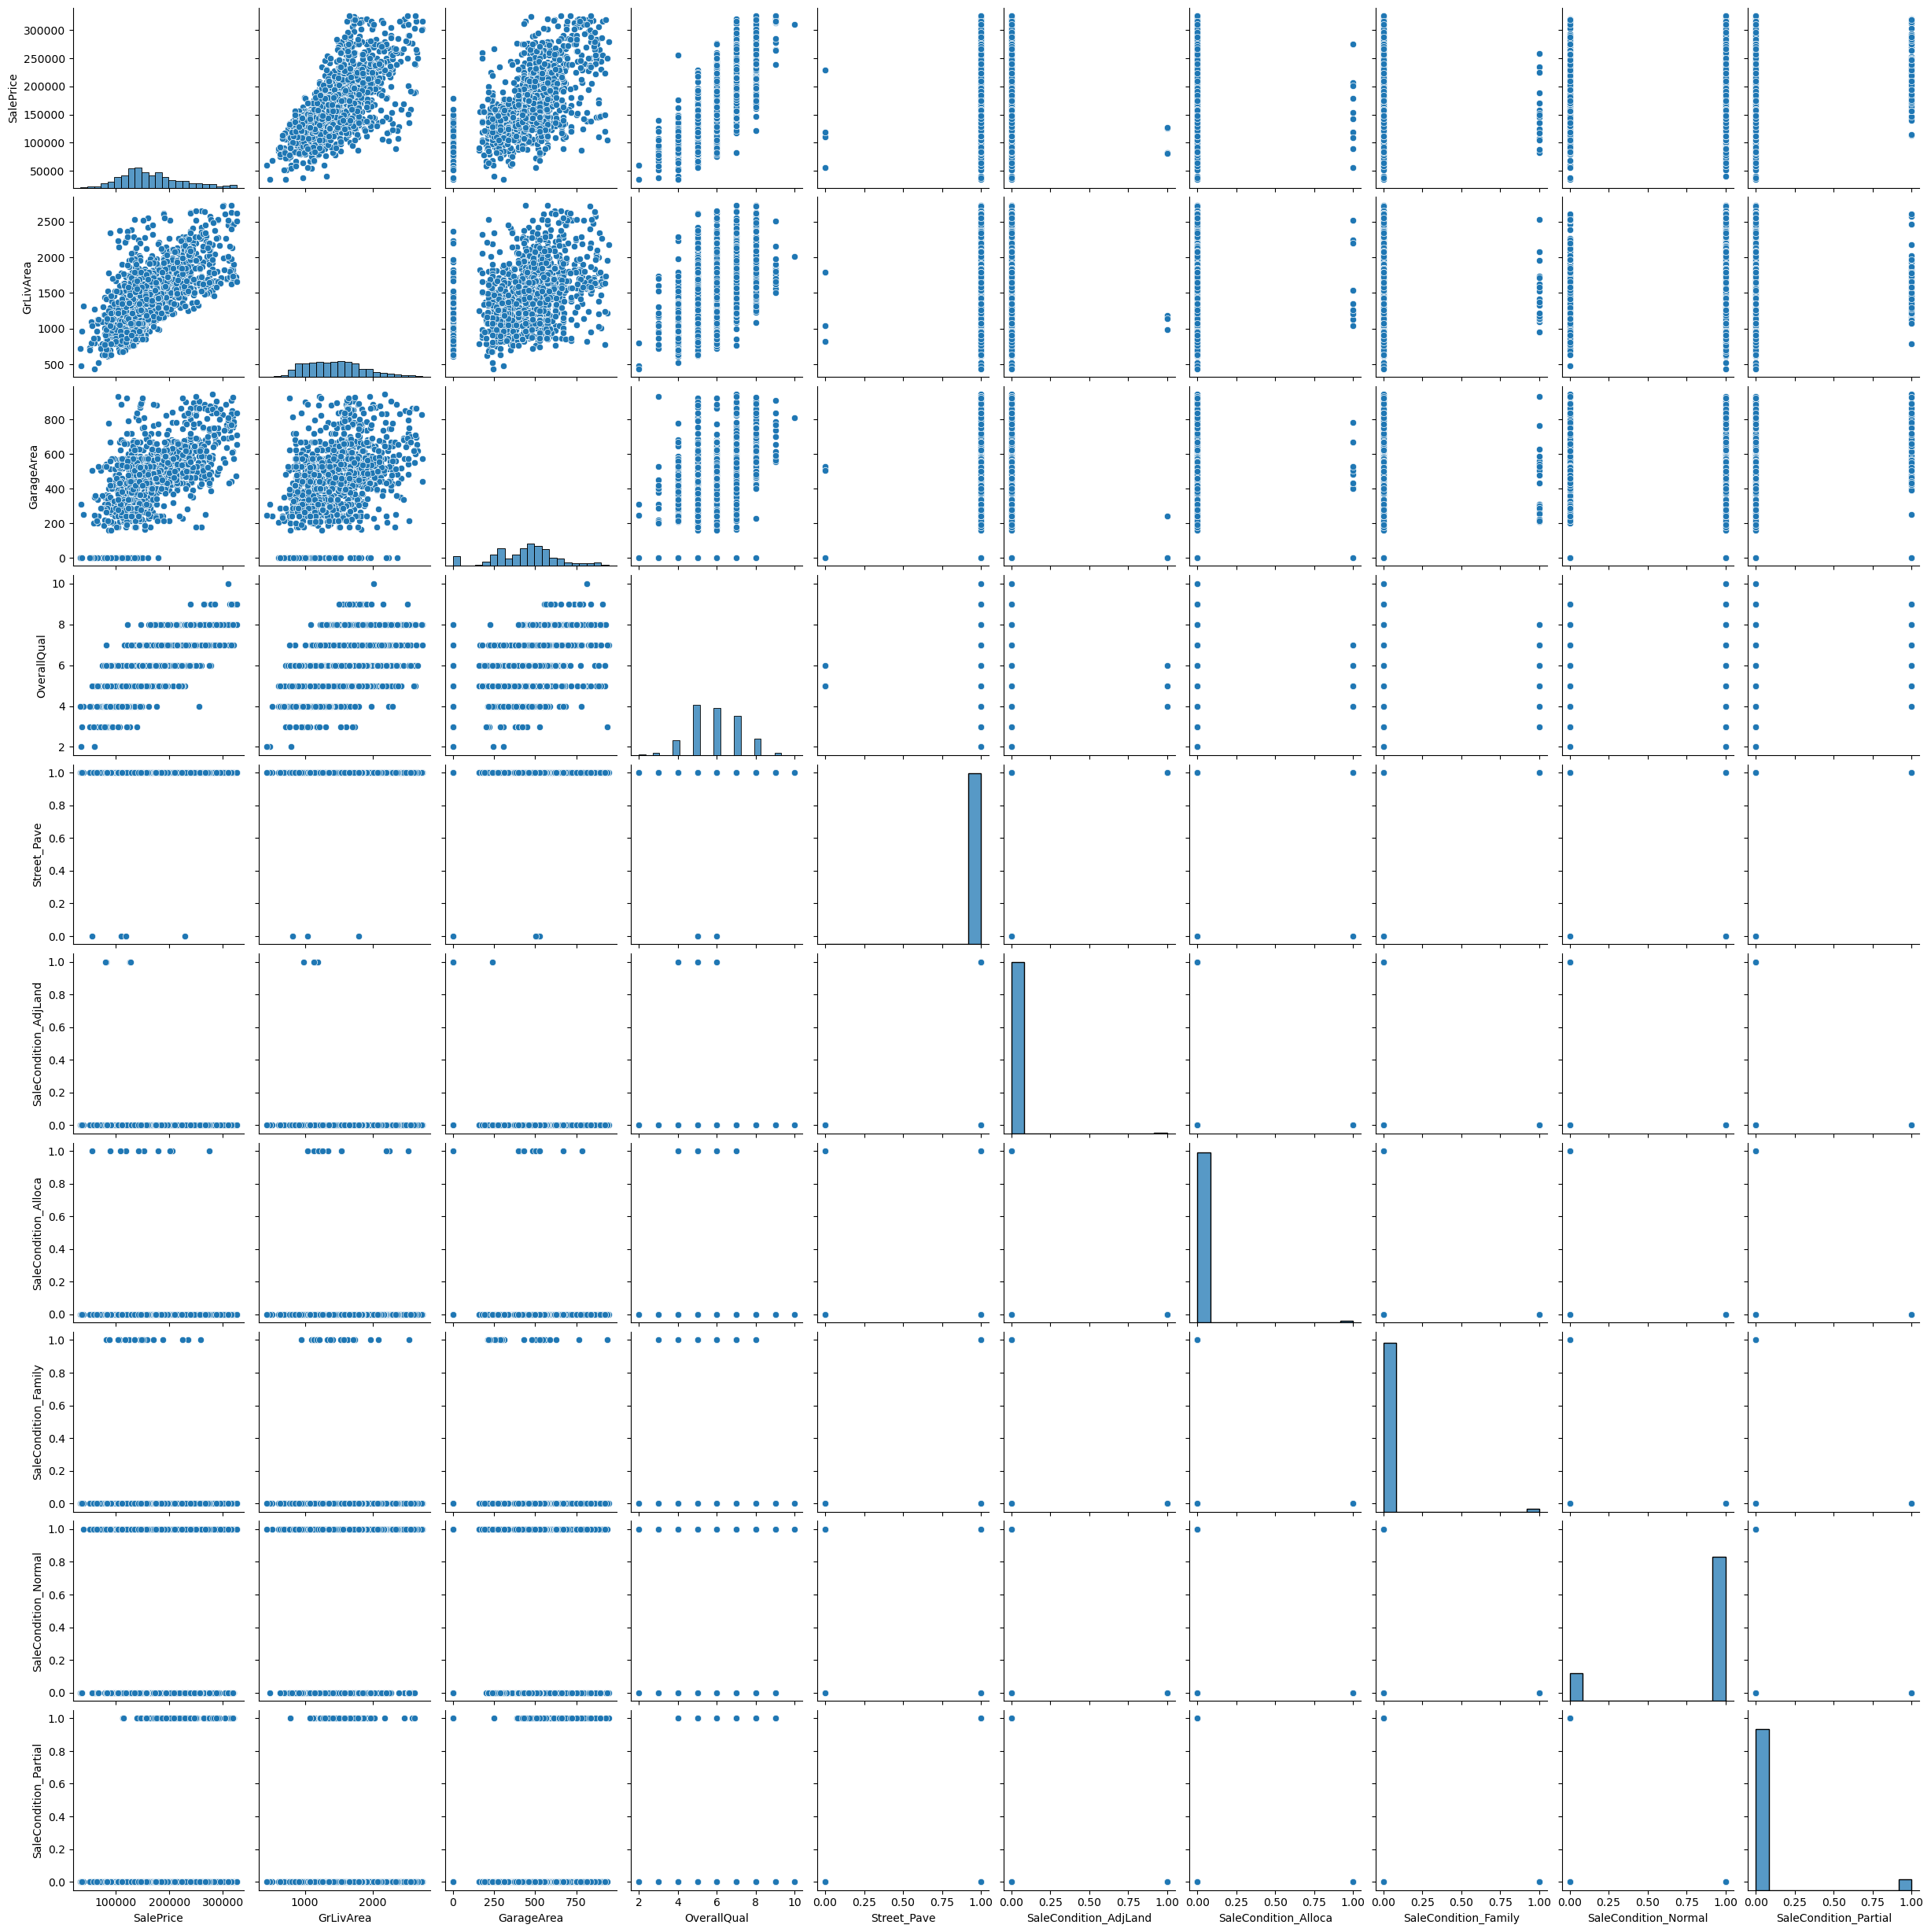

In [77]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Зависимость SalePrice от GrLivArea')
plt.show()

sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.title('Зависимость SalePrice от GarageArea')
plt.show()

sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Зависимость SalePrice от OverallQual')
plt.show

sns.pairplot(df)
plt.show


df = pd.get_dummies(df, columns=['Street', 'SaleCondition'], drop_first=True)# выводится ошибка в связи с тем, что я несколько раз код выводил, но удалять нельзя, потому что это необходимо будет, в случае использования нового датасета
df.head()
numeric_columns = ['GrLivArea', 'GarageArea', 'OverallQual', 'SalePrice']
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# тут я уже обрабатываю числовые показатели, как было в обучении
df['SalePrice_log'] = np.log(df['SalePrice'] + 1)
df['GrLivArea_log'] = np.log(df['GrLivArea'])
df['GarageArea_log'] = np.log(df['GarageArea'] + 1)
#выводы делал до изменения в логорифм 
#Чем больше жилая площадь, тем выше цена.
#Также наблюдается положительная корреляция между площадью гаража и ценой продажи, но связь менее выраженная
#Дома с более высоким рейтингом качества  имеют более высокую цену

### 4. Разделение на обучающую и тестовую выборки

In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

### 6. Получение предсказаний для обучающей и тестовой выборок

In [72]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [78]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Обучающая выборка: MAE = {train_mae:.2f}, MSE = {train_mse:.2f}")
print(f"Тестовая выборка: MAE = {test_mae:.2f}, MSE = {test_mse:.2f}")

difference_mae = abs(train_mae - test_mae)
difference_mse = abs(train_mse - test_mse)
print(f"\nРазница между MAE (обучение - тест): {difference_mae:.2f}")
print(f"Разница между MSE (обучение - тест): {difference_mse:.2f}")
if difference_mae / train_mae < 0.2 and difference_mse / train_mse < 0.2:
    print("Модель не переобучена (разница между метриками менее 20%).")
else:
    print("Модель может быть переобучена или недообучена (разница между метриками значительная)")

Обучающая выборка: MAE = 21190.98, MSE = 782331496.33
Тестовая выборка: MAE = 19302.04, MSE = 634058715.20

Разница между MAE (обучение - тест): 1888.94
Разница между MSE (обучение - тест): 148272781.13
Модель не переобучена (разница между метриками менее 20%).


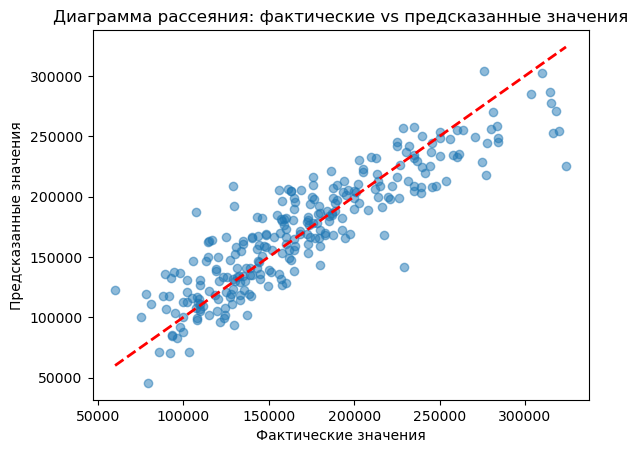

In [80]:
#диаграмма рассеяния целевой и предсказательных переменных, вроде как правильно сделал
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Диаграмма рассеяния: фактические vs предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()